# PHASE 1

### Traning on APPL


In [1]:
import cnn_model
from cnn_model import CNN
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temp = CNN()
temp.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [3]:
print(temp.model().summary())      

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               209740

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/AAPL', 
                                                       target_size=(15,15),
                                                       batch_size = 32, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/AAPL', 
                                                         target_size=(15,15),
                                                         batch_size = 32, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 7581 images belonging to 3 classes.
Found 2526 images belonging to 3 classes.


In [6]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [7]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=40, 
                             epochs=50,
                             validation_data=validation_dataset, 
                             validation_steps=20,
                             callbacks=callbacks)

C:\Users\ashut\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
40/40 [==============================] - 4s 67ms/step - loss: 1.0976 - accuracy: 0.4062 - val_loss: 1.0409 - val_accuracy: 0.4609
Epoch 2/50
40/40 [==============================] - 1s 26ms/step - loss: 1.0333 - accuracy: 0.4809 - val_loss: 0.9688 - val_accuracy: 0.4656
Epoch 3/50
40/40 [==============================] - 1s 25ms/step - loss: 0.9670 - accuracy: 0.4969 - val_loss: 0.8477 - val_accuracy: 0.6062
Epoch 4/50
40/40 [==============================] - 1s 25ms/step - loss: 0.9043 - accuracy: 0.5479 - val_loss: 0.7699 - val_accuracy: 0.6453
Epoch 5/50
40/40 [==============================] - 1s 26ms/step - loss: 0.8065 - accuracy: 0.6155 - val_loss: 0.7407 - val_accuracy: 0.6516
Epoch 6/50
40/40 [==============================] - 1s 26ms/step - loss: 0.7872 - accuracy: 0.6079 - val_loss: 0.7358 - val_accuracy: 0.6547
Epoch 7/50
40/40 [==============================] - 1s 29ms/step - loss: 0.7768 - accuracy: 0.6177 - val_loss: 0.7227 - val_accuracy: 0.6438

Epoch 00007:

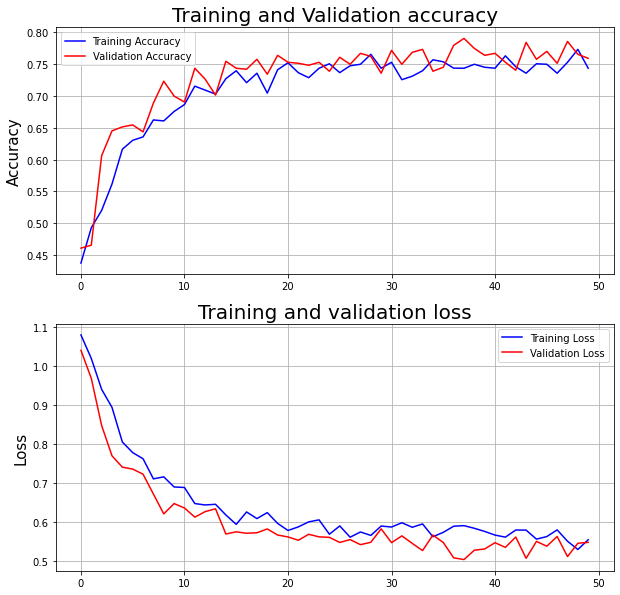

In [8]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.grid('True')

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')

plt.show()

In [9]:
image_generator = ImageDataGenerator(rescale=1/255)

testing_dataset = image_generator.flow_from_directory(directory='Data/NSEI', 
                                                       target_size=(15,15),
                                                       batch_size = 16, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')

results = temp.evaluate(testing_dataset)
results

Found 3251 images belonging to 3 classes.
204/204 [==============================] - 2s 10ms/step - loss: 0.6855 - accuracy: 0.6816


[0.6855174899101257, 0.681636393070221]

# PHASE 2


### Traning on ADANIPOWER, RELIANCE, AMZN


In [3]:
from keras.models import load_model

temp = load_model('MODEL/type_2/phase_1/')

In [15]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/AMZN', 
                                                       target_size=(15,15),
                                                       batch_size = 32, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/AMZN', 
                                                         target_size=(15,15),
                                                         batch_size = 32, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 4469 images belonging to 3 classes.
Found 1488 images belonging to 3 classes.


In [16]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [17]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=40, 
                             epochs=50,
                             validation_data=validation_dataset, 
                             validation_steps=20,
                             callbacks=callbacks)

Epoch 1/50
40/40 [==============================] - 17s 416ms/step - loss: 0.5115 - accuracy: 0.7836 - val_loss: 0.4793 - val_accuracy: 0.7734
Epoch 2/50
40/40 [==============================] - 12s 299ms/step - loss: 0.5208 - accuracy: 0.7656 - val_loss: 0.4577 - val_accuracy: 0.7953
Epoch 3/50
40/40 [==============================] - 8s 199ms/step - loss: 0.5209 - accuracy: 0.7711 - val_loss: 0.4506 - val_accuracy: 0.8219
Epoch 4/50
40/40 [==============================] - 6s 142ms/step - loss: 0.5007 - accuracy: 0.7762 - val_loss: 0.4553 - val_accuracy: 0.8094
Epoch 5/50
40/40 [==============================] - 4s 110ms/step - loss: 0.4986 - accuracy: 0.7758 - val_loss: 0.4835 - val_accuracy: 0.7797
Epoch 6/50
40/40 [==============================] - 4s 90ms/step - loss: 0.5026 - accuracy: 0.7828 - val_loss: 0.4654 - val_accuracy: 0.7953
Epoch 7/50
40/40 [==============================] - 3s 78ms/step - loss: 0.4755 - accuracy: 0.7914 - val_loss: 0.4716 - val_accuracy: 0.7984
Epoch 

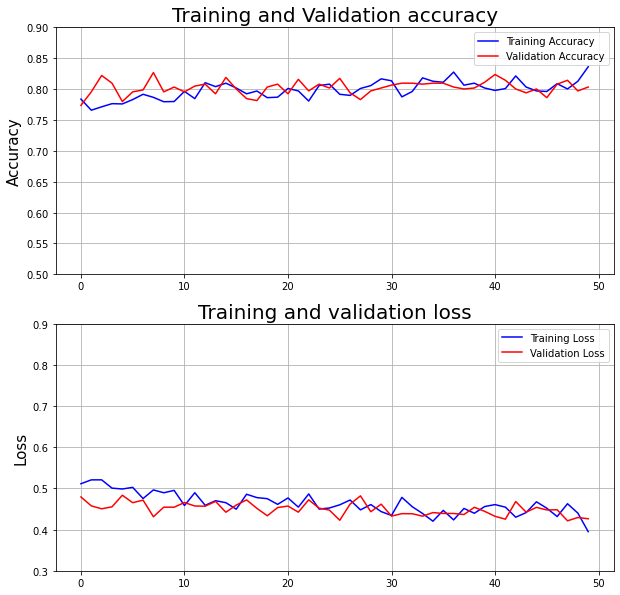

In [22]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.set_ylim([0.5, 0.9])
ax1.grid('True')


ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')
ax2.set_ylim([0.3, 0.9])

plt.show()

In [23]:
temp.save('MODEL/type_2/phase_2/')

INFO:tensorflow:Assets written to: MODEL/type_2/phase_2/assets


INFO:tensorflow:Assets written to: MODEL/type_2/phase_2/assets


# PHASE 3
### Traning on NASDAQ & NIFTY500 INDICES

In [1]:
import cnn_model
from cnn_model import CNN
import pandas as pd

temp = CNN()
temp.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [6]:
from keras.models import load_model

temp = load_model('MODEL/type_2/phase_2/')

In [11]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/NIFTY500', 
                                                       target_size=(15,15),
                                                       batch_size = 32, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/NIFTY500', 
                                                         target_size=(15,15),
                                                         batch_size = 32, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 2818 images belonging to 3 classes.
Found 938 images belonging to 3 classes.


In [12]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [13]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=40, 
                             epochs=50,
                             validation_data=validation_dataset, 
                             validation_steps=20,
                             callbacks=callbacks)

C:\Users\ashut\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
40/40 [==============================] - 17s 422ms/step - loss: 0.4998 - accuracy: 0.7812 - val_loss: 0.3921 - val_accuracy: 0.8328
Epoch 2/50
40/40 [==============================] - 8s 199ms/step - loss: 0.4660 - accuracy: 0.7992 - val_loss: 0.4307 - val_accuracy: 0.7859
Epoch 3/50
40/40 [==============================] - 5s 119ms/step - loss: 0.4555 - accuracy: 0.8016 - val_loss: 0.4102 - val_accuracy: 0.8094
Epoch 4/50
40/40 [==============================] - 3s 80ms/step - loss: 0.4542 - accuracy: 0.8184 - val_loss: 0.3955 - val_accuracy: 0.8125
Epoch 5/50
40/40 [==============================] - 2s 52ms/step - loss: 0.4409 - accuracy: 0.7968 - val_loss: 0.3958 - val_accuracy: 0.8094
Epoch 6/50
40/40 [==============================] - 2s 51ms/step - loss: 0.4249 - accuracy: 0.8195 - val_loss: 0.4019 - val_accuracy: 0.8125
Epoch 7/50
40/40 [==============================] - 1s 37ms/step - loss: 0.4384 - accuracy: 0.8141 - val_loss: 0.4001 - val_accuracy: 0.8188
Epoch 8/5

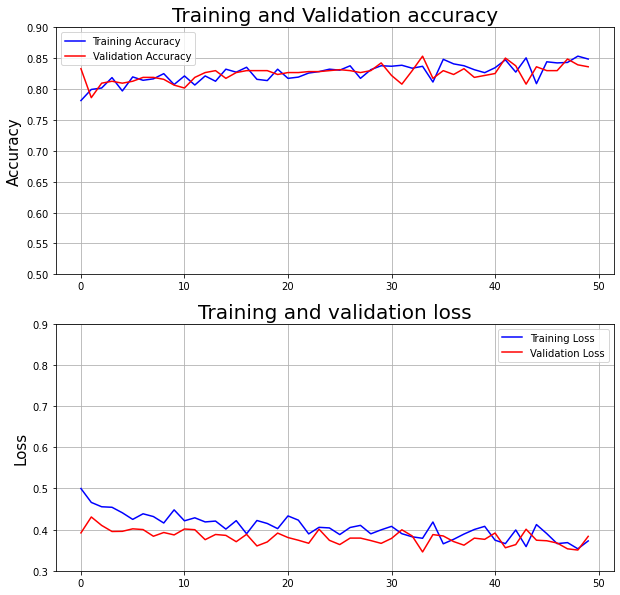

In [14]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.set_ylim([0.5, 0.9])
ax1.grid('True')


ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')
ax2.set_ylim([0.3, 0.9])

plt.show()

In [15]:
temp.save('MODEL/type_2/phase_3/')

INFO:tensorflow:Assets written to: MODEL/type_2/phase_3/assets


INFO:tensorflow:Assets written to: MODEL/type_2/phase_3/assets


In [3]:
training_dataset.class_indices

{'Buy': 0, 'Hold': 1, 'Sell': 2}